# Tracy Qian ECE421 Assignment #3

Install Dependencies

In [3]:
import sklearn
from sklearn import model_selection,datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

Collect trianing and testing data

In [21]:
train_x,train_y = datasets.load_iris('iris')
train_x = train_x[:100,:2]
train_y = train_y[:100]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.8,random_state=0)

**#1Binary Classifier**

Training Binary model (linear regression)

In [39]:
#clf = LR(random_state=0).fit(X_train, y_train)

logreg = LR()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Visualize decision boundary

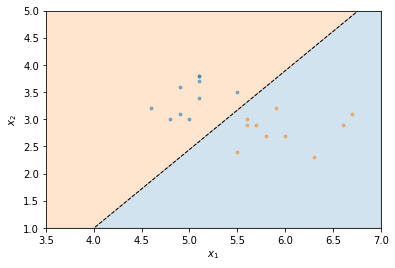

In [47]:
w1,w2 = clf.coef_.T
b = clf.intercept_
c = -b/w2
m = -w1/w2

xmin, xmax = 3.5, 7
ymin, ymax = 1, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X_train[y_train==0].T, s=8, alpha=0.5)
plt.scatter(*X_train[y_train==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

Calculate Accuracy

In [85]:
#2
y_pred_class = logreg.predict(X_test)
print("TESTING SET ACCURACY IS")
print(metrics.accuracy_score(y_test, y_pred_class))

y_pred_class = logreg.predict(X_train)
print("TRAINING SET ACCURACY IS")
print(metrics.accuracy_score(y_train, y_pred_class))

TESTING SET ACCURACY IS
0.9875
TRAINING SET ACCURACY IS
1.0


**Support Vector Machine**

Train SVD model

In [80]:
SVM_clf = SVC(kernel='linear',C = 1000)
SVM_clf.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Visualize decision boundary of the classier and its margins

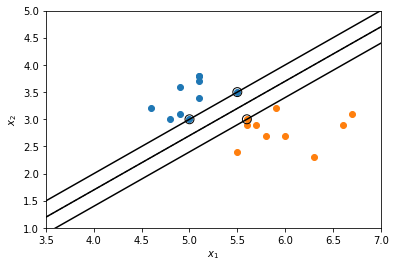

In [81]:
#3
w1, w2 = SVM_clf.coef_.T
b = SVM_clf.intercept_

xmin, xmax = 3.5, 7
ymin, ymax = 1, 5

a = -w1 / w2
xd = np.array([xmin, xmax])
yd = a * xd - (b) / w2

margin = 1 / np.sqrt(np.sum(SVM_clf.coef_ ** 2))
yy_down = yd - np.sqrt(1 + a**2)*margin
yy_up = yd + np.sqrt(1 + a**2)*margin

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.plot(xd, yd, "k")
plt.plot(xd, yy_down, "k")
plt.plot(xd, yy_up, "k")

plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1], label = "blue")
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label = "red")
plt.scatter(SVM_clf.support_vectors_[:, 0], SVM_clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [ ]:
#4
print("alpha for non support vector is zero")

Calculate Accuracy

In [86]:
#5
y_pred_class = SVM_clf.predict(X_test)
print("TESTING SET ACCURACY IS")
print(metrics.accuracy_score(y_test, y_pred_class))

y_pred_class = SVM_clf.predict(X_train)
print("TRAINING SET ACCURACY IS")
print(metrics.accuracy_score(y_train, y_pred_class))

TESTING SET ACCURACY IS
1.0
TRAINING SET ACCURACY IS
1.0


In [96]:
#6
print(margin*2)
#7
print("vector w is orthongonal to decision boundary (hyperplane)")

0.42430075463962524
vector w is orthongonal to decision boundary (hyperplane)


**#8 Trained model again with 0.4 test size**

In [102]:
train_x,train_y = datasets.load_iris('iris')
train_x = train_x[:100,:2]
train_y = train_y[:100]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.4,random_state=0)

In [103]:
SVM_clf = SVC(kernel='linear',C = 1000)
SVM_clf.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

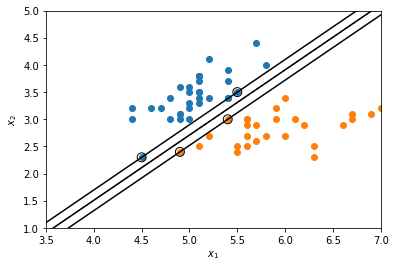

In [104]:
w1, w2 = SVM_clf.coef_.T
b = SVM_clf.intercept_

xmin, xmax = 3.5, 7
ymin, ymax = 1, 5

a = -w1 / w2
xd = np.array([xmin, xmax])
yd = a * xd - (b) / w2

margin = 1 / np.sqrt(np.sum(SVM_clf.coef_ ** 2))
yy_down = yd - np.sqrt(1 + a**2)*margin
yy_up = yd + np.sqrt(1 + a**2)*margin

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.plot(xd, yd, "k")
plt.plot(xd, yy_down, "k")
plt.plot(xd, yy_up, "k")

plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1], label = "blue")
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label = "red")
plt.scatter(SVM_clf.support_vectors_[:, 0], SVM_clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

In [97]:
y_pred_class = SVM_clf.predict(X_test)
print("TESTING SET ACCURACY IS")
print(metrics.accuracy_score(y_test, y_pred_class))

y_pred_class = SVM_clf.predict(X_train)
print("TRAINING SET ACCURACY IS")
print(metrics.accuracy_score(y_train, y_pred_class))

print(margin*2)

TESTING SET ACCURACY IS
1.0
TRAINING SET ACCURACY IS
1.0
0.42430075463962524


In [94]:
print("the deicison boundary didn't change, because the accuracy is still 100% ")

the deicison boundary didn't change, because the accuracy is still 100% 


In [ ]:
#9
print("binary linear classier and SVM have different decision boundaries")

**#10 Training Full Iris Dataset**

In [20]:
train_x,train_y = datasets.load_iris('iris')
train_x = train_x[:,:2]
train_y = train_y[:]
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.4,random_state=0)

In [21]:
clf = SVC(kernel='poly', degree=3, C=1000)
clf.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

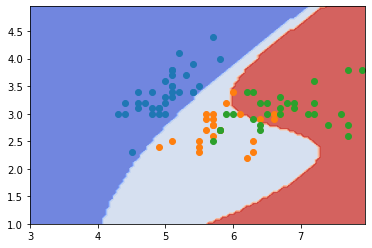

In [26]:
xmin, xmax = 3, 8
ymin, ymax = 1, 5
h = 0.05

xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                     np.arange(ymin, ymax, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1], label = "blue")
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label = "red")
plt.scatter(X_train[y_train == 2][:,0], X_train[y_train == 2][:,1], label = "green")

plt.show()


If we use the whole 150 data, it is no longer 2 classes thus can't be separated into 2 classes. We need 3 lines to classify the 3 classes. 